In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

modelo_1 = tf.keras.models.load_model('../ecg_project/ecg_cnn.keras')
modelo_2 = tf.keras.models.load_model('../ecg_project/modelo_pre_entrenado_ecg.keras')

In [5]:
df = pd.read_csv("data_imagenes_test.csv")

def cargar_imagen(ruta, modelo_tipo):
    if modelo_tipo == "grayscale":
        imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
        imagen = cv2.resize(imagen, (224, 224))
        imagen = np.expand_dims(imagen, axis=-1)
    else:
        imagen = cv2.imread(ruta, cv2.IMREAD_COLOR)
        imagen = cv2.resize(imagen, (224, 224))
    
    imagen = imagen / 255.0
    return imagen


X_test_gray = np.array([cargar_imagen(path, "grayscale") for path in df['image_path']])
X_test_rgb = np.array([cargar_imagen(path, "rgb") for path in df['image_path']])
y_test = df['label'].values


y_pred_1 = np.argmax(modelo_1.predict(X_test_gray), axis=1)
y_pred_2 = np.argmax(modelo_2.predict(X_test_rgb), axis=1)

85/85 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 741s 9s/step


Precisión Modelo Propio: 0.7774098601913172
Precisión Modelo Preentrenado: 0.8395879323031641


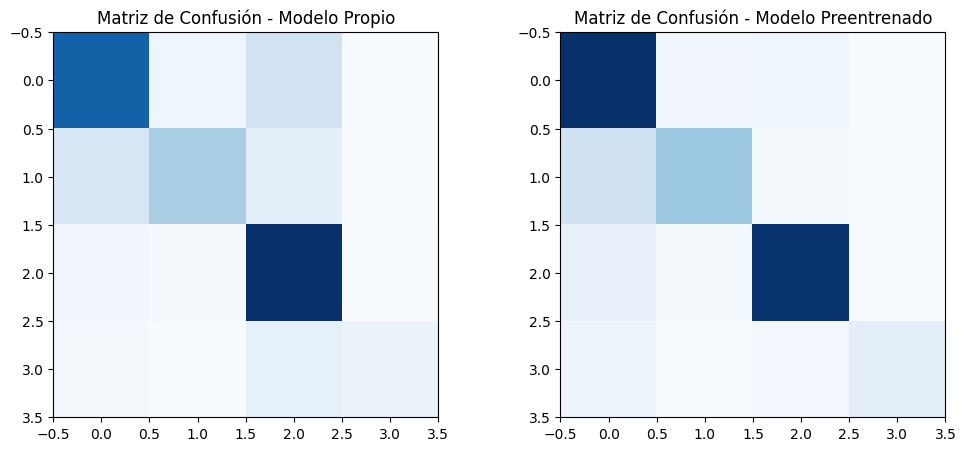

Reporte Modelo 1:
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      1000
         1.0       0.86      0.58      0.70       556
         2.0       0.73      0.95      0.83      1000
         3.0       0.94      0.38      0.54       162

    accuracy                           0.78      2718
   macro avg       0.83      0.67      0.71      2718
weighted avg       0.79      0.78      0.77      2718

Reporte Modelo 2:
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.83      1000
         1.0       0.89      0.64      0.74       556
         2.0       0.91      0.91      0.91      1000
         3.0       0.93      0.56      0.69       162

    accuracy                           0.84      2718
   macro avg       0.87      0.76      0.80      2718
weighted avg       0.85      0.84      0.84      2718



In [6]:
accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print("Precisión Modelo Propio:", accuracy_1)
print("Precisión Modelo Preentrenado:", accuracy_2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)

axes[0].imshow(cm_1, cmap='Blues')
axes[0].set_title("Matriz de Confusión - Modelo Propio")
axes[1].imshow(cm_2, cmap='Blues')
axes[1].set_title("Matriz de Confusión - Modelo Preentrenado")

plt.show()

print("Reporte Modelo 1:")
print(classification_report(y_test, y_pred_1))
print("Reporte Modelo 2:")
print(classification_report(y_test, y_pred_2))